# IBM Data Science specialization <br>
# Luxury goods store at Mexico City Borough<br>
### Santana Abad Luis Carlos<br>
### 2020<br>


## Table of content

1.	Introduction to the business problem
2.	Data acquisition and cleaning
3.	Methodology
4.	Results
5.	Discussion	
6.	Conclusion	
7.	References:	



# Capstone Project - The Battle of Neighborhoods (Week 1)

## 1. Introduction to the business problem

This business problem is part of the first part of the IBM Data Science specialization. The purpose of this capstone is to define a problem or an idea of my choice, where I would need to leverage the Foursquare location data to solve or execute. According to this criteria, I've decided to create a case described below. <br>

Find opportunities in the Mexican market for Luxury Goods is a task that we can achieve with the right Data Analysis. According to statista.com the luxury market size in Mexico is about US $3.584 M, one of the largest in Latin America. <br>

In Mexico City, a client / contractor is interested in knowing where to open a luxury goods store at Coyoacan borough of Mexico City, it is important to know the economic development of the neighborhoods, as well as to know the 10 businesses closest common to know the competition and preferences of the area to study in order to discover the right place to open a store to be successful.

## 2. Data acquisition and cleaning 

As is the case when shopping for ingredients to make a meal, some ingredients might be out of season and more difficult to obtain or cost more than initially thought, collecting data requires that you know the source or, know where to find the data elements that are needed.<br>
Development in neighborhoods reflects social and economic progress and requires economic growth, which means in potential clients to sell, therefore I decided to include the economic development for each neighborhood in Coyoacan. This data was provided by the Mexican government website.<br>
Zip codes I needed to search was on the list at Here API in order to get the coordinates from the neighborhoods with this data, I could be able to graph a map with all the neighborhoods in the city.<br>
Finally, used the Foursquare API to get the data of the nearest venues in different neighborhoods to make a further analysis of the goods that will be selling.<br><br>
Data URL's:<br>

Zip Code and neighborhoods from Mexico City: https://www.correosdemexico.gob.mx/SSLServicios/ConsultaCP/CodigoPostal_Exportar.aspx <br>
Here API to know the neighborhoods location: https://developer.here.com/<br>
Social Development Index by neighborhood, Mexico City neighborhood: http://www.sideso.cdmx.gob.mx/index.php?id=551<br>
Foursquare API to make an analysis of the venues nearest to the Neighborhoods: https://developer.foursquare.com/<br>



# Capstone Project - The Battle of Neighborhoods (Week 2)

## Segmenting and Clustering Neighborhoods in Mexico City

Install lxml library and then restart the kernel to be able of run without troubles

In [2]:
%pip install lxml

     |████████████████████████████████| 5.5MB 5.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Convert an address into latitude and longitude values

In [3]:
!pip install geocoder

     |████████████████████████████████| 102kB 5.3MB/s ta 0:00:011
     |████████████████████████████████| 92kB 5.3MB/s eta 0:00:011
     |████████████████████████████████| 829kB 5.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


Import all the required libraries

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [5]:
!pip install --upgrade lxml

Requirement already up-to-date: lxml in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (4.5.1)


In [6]:
import pandas as pd
#url=("Ciudad de México.xls")
tables = pd.read_excel(r"Ciudad de México.xls")
print(tables)
#print(tables[0])
#df=tables[0]

      d_codigo                    d_asenta d_tipo_asenta         D_mnpio  \
0         1000                   San Ángel       Colonia  Álvaro Obregón   
1         1010                   Los Alpes       Colonia  Álvaro Obregón   
2         1020               Guadalupe Inn       Colonia  Álvaro Obregón   
3         1030                      Axotla        Pueblo  Álvaro Obregón   
4         1030                     Florida       Colonia  Álvaro Obregón   
...        ...                         ...           ...             ...   
1534     16840      Santa Cruz Chavarrieta       Colonia      Xochimilco   
1535     16850                 Chapultepec        Barrio      Xochimilco   
1536     16860     Santa Cruz de Guadalupe       Colonia      Xochimilco   
1537     16880     Santa Cecilia Tepetlapa        Pueblo      Xochimilco   
1538     16900  San Francisco Tlalnepantla        Pueblo      Xochimilco   

              d_estado          d_ciudad   d_CP  c_estado  c_oficina  c_CP  \
0     Ciu

## 3.	Methodology

From Understanding to Preparation. <br>
The Zip Code data frame was containing a lot of information, however I drop all the columns that I didn't need and reduce to get just the neighborhood and the zip code.


In [7]:
tables

d_codigo                    d_asenta d_tipo_asenta         D_mnpio  \
0         1000                   San Ángel       Colonia  Álvaro Obregón   
1         1010                   Los Alpes       Colonia  Álvaro Obregón   
2         1020               Guadalupe Inn       Colonia  Álvaro Obregón   
3         1030                      Axotla        Pueblo  Álvaro Obregón   
4         1030                     Florida       Colonia  Álvaro Obregón   
...        ...                         ...           ...             ...   
1534     16840      Santa Cruz Chavarrieta       Colonia      Xochimilco   
1535     16850                 Chapultepec        Barrio      Xochimilco   
1536     16860     Santa Cruz de Guadalupe       Colonia      Xochimilco   
1537     16880     Santa Cecilia Tepetlapa        Pueblo      Xochimilco   
1538     16900  San Francisco Tlalnepantla        Pueblo      Xochimilco   

              d_estado          d_ciudad   d_CP  c_estado  c_oficina  c_CP  \
0     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
1     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
2     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
3     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
4     Ciudad de México  Ciudad de México   1001         9       1001   NaN   
...                ...               ...    ...       ...        ...   ...   
1534  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1535  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1536  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1537  Ciudad de México  Ciudad de México  16001         9      16001   NaN   
1538  Ciudad de México  Ciudad de México  16001         9      16001   NaN   

      c_tipo_asenta  c_mnpio  id_asenta_cpcons  d_zona  c_cve_ciudad  
0                 9       10                 1  Urbano             1  
1                 9       10                 5  Urbano             1  
2                 9       10                 6  Urbano             1  
3                28       10                 9  Urbano             1  
4                 9       10                10  Urbano             1  
...             ...      ...               ...     ...           ...  
1534              9       13              2519  Urbano            16  
1535              2       13              2520  Urbano            16  
1536              9       13              2521  Urbano            16  
1537             28       13              2527  Urbano            16  
1538             28       13              2530  Urbano            16  

[1539 rows x 15 columns]

In [8]:
cdmx=tables[['d_codigo','D_mnpio','d_asenta']]
cdmx.head()
#cdmx.to_frame()

d_codigo         D_mnpio       d_asenta
0      1000  Álvaro Obregón      San Ángel
1      1010  Álvaro Obregón      Los Alpes
2      1020  Álvaro Obregón  Guadalupe Inn
3      1030  Álvaro Obregón         Axotla
4      1030  Álvaro Obregón        Florida

In [9]:
cdmx.shape

(1539, 3)

In [10]:
#https://developer.here.com/blog/understanding-geocoding-with-python
import requests
i=0

for cp, borrowhood, neighborhood in zip(cdmx["d_codigo"], cdmx["D_mnpio"], cdmx["d_asenta"]):
    
    URL = "https://geocode.search.hereapi.com/v1/geocode"
    #location = "1000, Álvaro Obregón, Ciudad de México" #taking user input
    location = "{},{},{}".format(cp, borrowhood, neighborhood)
    api_key = 'qoLgTnaCZ0oAM52dIbKGBdiwMbL0M5-A5IehEXPPqGE' # Acquire from developer.here.com
    PARAMS = {'apikey':api_key,'q':location}
    # sending get request and saving the response as response object 
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json()
    
    try:
        latitude = data['items'][0]['position']['lat']
        longitude = data['items'][0]['position']['lng']
        
        if i == 0:
            get_geocoder=[(("{}".format(cp)), latitude, longitude)]            
            get_geocoder2=pd.DataFrame(get_geocoder,columns =['d_codigo', 'latitude', 'longitude'])
            i=i+1
        else:
            new_row = {'d_codigo':"{}".format(cp), 'latitude':latitude, 'longitude':longitude}
            #append row to the dataframe
            get_geocoder2 = get_geocoder2.append(new_row, ignore_index=True)
            #get_geocoder2 = get_geocoder2.append(get_geocoder, ignore_index=True)
            i=i+1
    except IndexError:
        # Return something that tells the user no results where found
        print("None")
           #/code that runs when error happen
    

None
None
None
None
None


In [11]:
get_geocoder2.head()
get_geocoder2.shape

(1534, 3)

In [12]:
get_geocoder2.head()

d_codigo  latitude  longitude
0     1000  19.34602  -99.19177
1     1010  19.36094  -99.19382
2     1020  19.34655  -99.20738
3     1030  19.36300  -99.17728
4     1030  19.35530  -99.18151

### When I merged the data frame generated by Here API it was transformed in this:

In [13]:
get_geocoder2['d_codigo']=get_geocoder2['d_codigo'].astype(int)
Neighborhoods = pd.merge(cdmx, get_geocoder2, on='d_codigo')

In [14]:
Neighborhoods.columns = ['Postal Code','Borough','Neighborhood','Latitude','Longitude']
Neighborhoods.head()

Postal Code         Borough   Neighborhood  Latitude  Longitude
0         1000  Álvaro Obregón      San Ángel  19.34602  -99.19177
1         1010  Álvaro Obregón      Los Alpes  19.36094  -99.19382
2         1020  Álvaro Obregón  Guadalupe Inn  19.34655  -99.20738
3         1030  Álvaro Obregón         Axotla  19.36300  -99.17728
4         1030  Álvaro Obregón         Axotla  19.35530  -99.18151

In [15]:
Neighborhoods=Neighborhoods.dropna()

In [16]:
address = 'Ciudad de México, México'

geolocator = Nominatim(user_agent="mexico_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 19.4326296, -99.1331785.


In [17]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Filtrar por delegación (Boroughood) sin ejecutar

In [18]:
alv_obr_data = Neighborhoods[Neighborhoods['Borough'].str.contains("Xochimilco", case=False)].reset_index(drop=True)
#alv_obr_data.head()
#alv_obr_data.dtypes
alv_obr_data.shape


(220, 5)

In [19]:
alv_obr_data.head()

Postal Code     Borough            Neighborhood  Latitude  Longitude
0        16000  Xochimilco  La Concepción Tlacoapa  19.26893  -99.10475
1        16000  Xochimilco  La Concepción Tlacoapa  19.26182  -99.10762
2        16000  Xochimilco  La Concepción Tlacoapa  19.26551  -99.10684
3        16000  Xochimilco             San Antonio  19.26893  -99.10475
4        16000  Xochimilco             San Antonio  19.26182  -99.10762

### Generar mapa CDMX con Delegaciones y Colonias

In [20]:
# CDMX latitude and longitude
cdmx_lat = 19.4326296
cdmx_lng = -99.1331785

# Creates map of CDMX using latitude and longitude values
map_cdmx = folium.Map(location=[cdmx_lat, cdmx_lng], zoom_start=10)

# Add markers to map
for lat, lng, neighbourhood in zip(Neighborhoods['Latitude'], Neighborhoods['Longitude'], Neighborhoods['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cdmx)  
    
map_cdmx

### Map of Coyoacan boroughs with all the neighborhoods represented by blue points:


In [21]:
Neighborhoods['Borough'].unique()

array(['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán',
       'Cuajimalpa de Morelos', 'Cuauhtémoc', 'Gustavo A. Madero',
       'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
       'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan',
       'Venustiano Carranza', 'Xochimilco'], dtype=object)

In [22]:
borough_target="Coyoacán"

In [23]:
borough_data = Neighborhoods[Neighborhoods['Borough'].str.contains(borough_target, case=False)].reset_index(drop=True)
#alv_obr_data.head()
#alv_obr_data.dtypes
borough_data.shape


(166, 5)

In [24]:
borough_data.head()

Postal Code   Borough       Neighborhood  Latitude  Longitude
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231
2         4020  Coyoacán      La Concepción  19.34480  -99.15750
3         4030  Coyoacán          San Lucas  19.34863  -99.15401
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520

In [25]:
address = 'Coyoacán, Ciudad de México'

geolocator = Nominatim(user_agent="mexico_explorer")
location = geolocator.geocode(address)
borough_latitude = location.latitude
borough_longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 19.4326296, -99.1331785.


In [26]:
# Creates map of Milpa Alta using latitude and longitude values
map_borough = folium.Map(location=[borough_latitude, borough_longitude], zoom_start=13)

# Add markers to map
for lat, lng, neighbourhood in zip(borough_data['Latitude'], borough_data['Longitude'], borough_data['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_borough)  
    
map_borough

In [27]:
CLIENT_ID = 'RD3XL0PWSBNG2HHH0JGFLKYRTUQJVC3KPHS5VBWHZKVR0V2R' # your Foursquare ID
CLIENT_SECRET = 'S1PFT4XOBGNZPKF2OPRPIQMKFD4BL0QE3UI2STE244SX5EC3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
#old_toronto_data = Neighborhoods[Neighborhoods['Borough'] == 'Toronto'].reset_index(drop=True)
#old_toronto_data.head()

Your credentails:
CLIENT_ID: RD3XL0PWSBNG2HHH0JGFLKYRTUQJVC3KPHS5VBWHZKVR0V2R
CLIENT_SECRET:S1PFT4XOBGNZPKF2OPRPIQMKFD4BL0QE3UI2STE244SX5EC3


In [28]:
borough_data.head()

Postal Code   Borough       Neighborhood  Latitude  Longitude
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231
2         4020  Coyoacán      La Concepción  19.34480  -99.15750
3         4030  Coyoacán          San Lucas  19.34863  -99.15401
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        #global url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
LIMIT=100

borough_venues = getNearbyVenues(names=borough_data['Neighborhood'],
                                   latitudes=borough_data['Latitude'],
                                   longitudes=borough_data['Longitude']
                                  )



Villa Coyoacán
Santa Catarina
La Concepción
San Lucas
Parque San Andrés
Del Carmen
San Diego Churubusco
San Diego Churubusco
San Mateo
San Mateo
Campestre Churubusco
Churubusco Country Club
Prado Churubusco
Hermosillo
Paseos de Taxqueña
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de San Francisco
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de La Magdalena
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de Santa Ana
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
San Francisco Culhuacán Barrio de San Juan
Ajusco
Romero de Terreros
Oxtopulco

In [31]:
borough_venues.head()
borough_venues.shape

(5328, 7)

In [32]:
ids = pd.read_excel(r"IDS.xlsx")
ids.head()

Neighborhood  Habitantes  IDS_N
0            Adolfo Ruiz Cortínez       14119      2
1                          Ajusco       36665      2
2  Alianza Popular Revolucionaria       13627      4
3                       Atlántida         850      3
4                          Avante        9909      4

In [33]:

#get_geocoder2['d_codigo']=get_geocoder2['d_codigo'].astype(int)
borough_venues_IDS = pd.merge(borough_venues, ids, on='Neighborhood')
#borough_venues_IDS = borough_venues_IDS.set_index('Neighborhood')
borough_venues_IDS.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Villa Coyoacán                19.3485               -99.16331   
1  Villa Coyoacán                19.3485               -99.16331   
2  Villa Coyoacán                19.3485               -99.16331   
3  Villa Coyoacán                19.3485               -99.16331   
4  Villa Coyoacán                19.3485               -99.16331   

                   Venue  Venue Latitude  Venue Longitude      Venue Category  \
0               Coyoacán       19.349643       -99.163208        Neighborhood   
1  El Kiosko de Coyoacán       19.349964       -99.162764               Plaza   
2    Ristorante Amarcord       19.347275       -99.162597  Italian Restaurant   
3  Fuente de los Coyotes       19.349150       -99.163446       Historic Site   
4         Jardín Hidalgo       19.349654       -99.162343               Plaza   

   Habitantes  IDS_N  
0        1909      4  
1        1909      4  
2        1909      4  
3        1909      4  
4        1909      4

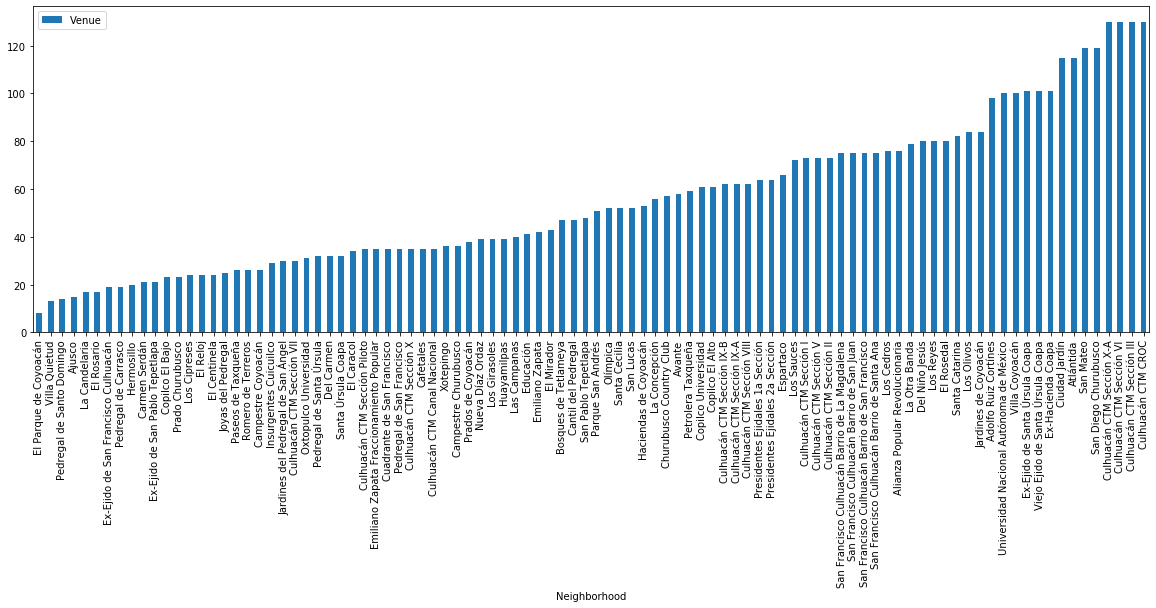

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# step 1: get the data
venue_count=borough_venues.groupby('Neighborhood').count()
venue_count=venue_count.sort_values('Venue')

df_iceland = venue_count[["Venue"]]
df_iceland.head()


# step 2: plot data
df_iceland.plot(kind='bar', figsize=(20, 6))

#plt.xlabel('Year') # add to x-label to the plot
#plt.ylabel('Number of immigrants') # add y-label to the plot
#plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

### In the next graph, I plotted the economic development for each neighborhood in Coyoacan, it is represented in a range from 1 to 4 max.

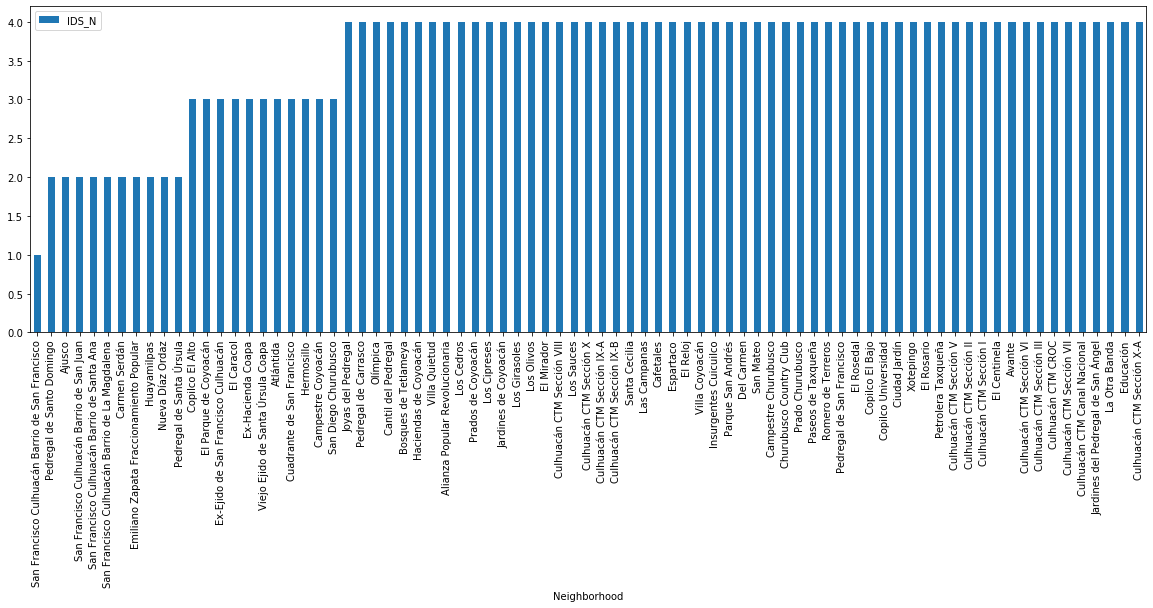

In [35]:
df_IDS = borough_venues_IDS.drop_duplicates(subset="Neighborhood",keep='first')#borough_venues_IDS[["Neighborhood", "IDS_N"]]
df_IDS_2=df_IDS[["Neighborhood","IDS_N"]]
df_IDS_2=df_IDS_2.reset_index(drop=True)
df_IDS_2= df_IDS_2.set_index('Neighborhood')
df_IDS_2=df_IDS_2.sort_values('IDS_N')

#df_IDS_2=df_IDS_2.reset_index(level='Neighborhood')
df_IDS_2
#df_iceland = venue_count[["Venue"]]
#df_iceland.head()


# step 2: plot data
df_IDS_2.plot(kind='bar', figsize=(20, 6))

#plt.xlabel('Year') # add to x-label to the plot
#plt.ylabel('Number of immigrants') # add y-label to the plot
#plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

#plt.show()

In [36]:
#df_IDS_3=df_IDS_2[df_IDS_2['IDS_N'] > 3]
#df_IDS_3

df_IDS_3=borough_venues_IDS[borough_venues_IDS['IDS_N'] > 3]
df_IDS_3.head()
borough_venues=df_IDS_3

In [37]:
print('There are {} uniques categories.'.format(len(borough_venues['Venue Category'].unique())))

There are 216 uniques categories.


In [38]:
# one hot encoding
neighborhood_onehot = pd.get_dummies(borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighborhood_onehot['Neighborhood'] = borough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neighborhood_onehot.columns[-1]] + list(neighborhood_onehot.columns[:-1])
neighborhood_onehot = neighborhood_onehot[fixed_columns]

neighborhood_onehot.head()

Yoga Studio  Accessories Store  American Restaurant  Arcade  \
0            0                  0                    0       0   
1            0                  0                    0       0   
2            0                  0                    0       0   
3            0                  0                    0       0   
4            0                  0                    0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  Baseball Field  \
0          0           0           0       0    0               0   
1          0           0           0       0    0               0   
2          0           0           0       0    0               0   
3          0           0           0       0    0               0   
4          0           0           0       0    0               0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Store  Bistro  Bookstore  \
0                 0                0         0           0       0          0   
1                 0                0         0           0       0          0   
2                 0                0         0           0       0          0   
3                 0                0         0           0       0          0   
4                 0                0         0           0       0          0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bridal Shop  Burger Joint  Burrito Place  Bus Line  Butcher  Cafeteria  \
0            0             0              0         0        0          0   
1            0             0              0         0        0          0   
2            0             0              0         0        0          0   
3            0             0              0         0        0          0   
4            0             0              0         0        0          0   

   Café  Camera Store  Candy Store  Casino  Castle  Cave  Cheese Shop  \
0     0             0            0       0       0     0            0   
1     0             0            0       0       0     0            0   
2     0             0            0       0       0     0            0   
3     0             0            0       0       0     0            0   
4     0             0            0       0       0     0            0   

   Chinese Restaurant  Church  Circus  Clothing Store  Cocktail Bar  \
0                   0       0       0               0             0   
1                   0       0       0               0             0   
2                   0       0       0               0             0   
3                   0       0       0               0             0   
4                   0       0       0               0             0   

   Coffee Shop  College Arts Build

In [39]:
neighborhood_onehot.shape

(3191, 216)

In [40]:
neighborhood_grouped = neighborhood_onehot.groupby('Neighborhood').mean().reset_index()
neighborhood_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  \
0  Alianza Popular Revolucionaria          0.0                0.0   
1                          Avante          0.0                0.0   
2            Bosques de Tetlameya          0.0                0.0   
3                       Cafetales          0.0                0.0   
4            Campestre Churubusco          0.0                0.0   

   American Restaurant  Arcade  Argentinian Restaurant  Art Gallery  \
0             0.000000     0.0                     0.0          0.0   
1             0.000000     0.0                     0.0          0.0   
2             0.042553     0.0                     0.0          0.0   
3             0.000000     0.0                     0.0          0.0   
4             0.000000     0.0                     0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0          0.000000                 0.0   
1         0.0                  0.0          0.017241                 0.0   
2         0.0                  0.0          0.000000                 0.0   
3         0.0                  0.0          0.000000                 0.0   
4         0.0                  0.0          0.000000                 0.0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop    Bakery  \
0          0.0            0.0        0.0         0.0         0.0  0.013158   
1          0.0            0.0        0.0         0.0         0.0  0.000000   
2          0.0            0.0        0.0         0.0         0.0  0.000000   
3          0.0            0.0        0.0         0.0         0.0  0.057143   
4          0.0            0.0        0.0         0.0         0.0  0.027778   

   Bar  Baseball Field  Basketball Court  Bed & Breakfast  Beer Bar  \
0  0.0             0.0          0.000000              0.0       0.0   
1  0.0             0.0          0.000000              0.0       0.0   
2  0.0             0.0          0.000000              0.0       0.0   
3  0.0             0.0          0.000000              0.0       0.0   
4  0.0             0.0          0.027778              0.0       0.0   

   Beer Store    Bistro  Bookstore  Boutique  Bowling Alley  \
0         0.0  0.000000        0.0       0.0       0.000000   
1         0.0  0.000000        0.0       0.0       0.000000   
2         0.0  0.000000        0.0       0.0       0.021277   
3         0.0  0.000000        0.0       0.0       0.000000   
4         0.0  0.027778        0.0       0.0       0.000000   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  Burger Joint  \
0              0.000000        0.000000      0.0          0.0      0.065789   
1              0.017241        0.017241      0.0          0.0      0.034483   
2              0.000000        0.000000      0.0          0.0      0.021277   
3              0.000000        0.000000      0.0          0.0      0.114286   
4              0.000000        0.000000      0.0          0.0      0.000000   

   Burrito Place  Bus Line  Butcher  Cafeteria      Café  Camera Store  \
0            0.0       0.0      0.0        0.0  0.000000           0.0   
1            0.0       0.0      0.0        0.0  0.000000           0.0   
2            0.0       0.0      0.0        0.0  0.042553           0.0   
3            0.0       0.0      0.0        0.0  0.000000           0.0   
4            0.0       0.0      0.0        0.0  0.055556           0.0   

   Candy Store  Casino  Castle      Cave  Cheese Shop  Chinese Restaurant  \
0          0.0     0.0     0.0  0.000000          0.0                 0.0   
1          0.0     0.0     0.0  0.000000          0.0                 0.0   
2          0.0     0.0     0.0  0.000000          0.0                 0.0   
3          0.0     0.0     0.0  0.000000          0.0                 0.0   
4          0.0     0.0     0.0  0.027778          0.0                 0.0   

   Church  Circus  Clothing Store  Cocktail Bar  Coffee Shop  \


In [41]:
neighborhood_grouped.shape

(57, 216)

In [42]:
num_top_venues = 5

for hood in neighborhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_grouped[neighborhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

----Alianza Popular Revolucionaria----
----Avante----
----Bosques de Tetlameya----
----Cafetales----
----Campestre Churubusco----
----Cantil del Pedregal----
----Churubusco Country Club----
----Ciudad Jardín----
----Copilco El Bajo----
----Copilco Universidad----
----Culhuacán CTM CROC----
----Culhuacán CTM Canal Nacional----
----Culhuacán CTM Sección I----
----Culhuacán CTM Sección II----
----Culhuacán CTM Sección III----
----Culhuacán CTM Sección IX-A----
----Culhuacán CTM Sección IX-B----
----Culhuacán CTM Sección V----
----Culhuacán CTM Sección VI----
----Culhuacán CTM Sección VII----
----Culhuacán CTM Sección VIII----
----Culhuacán CTM Sección X----
----Culhuacán CTM Sección X-A----
----Del Carmen----
----Educación----
----El Centinela----
----El Mirador----
----El Reloj----
----El Rosario----
----El Rosedal----
----Espartaco----
----Haciendas de Coyoacán----
----Insurgentes Cuicuilco----
----Jardines de Coyoacán----
----Jardines del Pedregal de San Ángel----
----Joyas del Pedrega

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhood_grouped['Neighborhood']

for ind in np.arange(neighborhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Alianza Popular Revolucionaria    Mexican Restaurant            Taco Place   
1                          Avante    Mexican Restaurant            Taco Place   
2            Bosques de Tetlameya          Soccer Field        Soccer Stadium   
3                       Cafetales    Mexican Restaurant          Burger Joint   
4            Campestre Churubusco                  Park            Taco Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Convenience Store          Burger Joint          Liquor Store   
1           Pizza Place            Restaurant        Ice Cream Shop   
2                  Park     Convenience Store            Restaurant   
3            Taco Place            Steakhouse    Seafood Restaurant   
4     Convenience Store    Mexican Restaurant            Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop          Dessert Shop            Restaurant   
1    Seafood Restaurant     Convenience Store                   Gym   
2           Pizza Place                  Café           Coffee Shop   
3                Bakery            Restaurant           Snack Place   
4                  Café            Food Truck           Pizza Place   

  9th Most Common Venue 10th Most Common Venue  
0            Steakhouse             Food Truck  
1          Burger Joint             Food Truck  
2                Garden     Mexican Restaurant  
3        Ice Cream Shop              Drugstore  
4        Shipping Store           Liquor Store

In [45]:
# set number of clusters
kclusters = 5

neighborhood_grouped_clustering = neighborhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 2, 1, 1, 2, 2, 1, 2, 2], dtype=int32)

### Then I cleaned the data and processed the data filtering the data to only worked with the higher economic development, to train a machine learning algorithm called "K-means" which show list of top 10 venue categorized for each neighborhood.

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

borough_merged = borough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
borough_merged = borough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


borough_merged.dropna()
borough_merged.head() # check the last columns!

Postal Code   Borough       Neighborhood  Latitude  Longitude  \
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331   
1         4010  Coyoacán     Santa Catarina  19.34809  -99.17231   
2         4020  Coyoacán      La Concepción  19.34480  -99.15750   
3         4030  Coyoacán          San Lucas  19.34863  -99.15401   
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             2.0    Mexican Restaurant           Coffee Shop   
1             NaN                   NaN                   NaN   
2             NaN                   NaN                   NaN   
3             NaN                   NaN                   NaN   
4             1.0    Mexican Restaurant              Pharmacy   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop                  Café                 Plaza   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4            Taco Place            Restaurant  Gym / Fitness Center   

  6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0             Bookstore                            Bar           Art Gallery   
1                   NaN                            NaN                   NaN   
2                   NaN                            NaN                   NaN   
3                   NaN                            NaN                   NaN   
4    Salon / Barbershop  Vegetarian / Vegan Restaurant                 Hotel   

  9th Most Common Venue 10th Most Common Venue  
0       Bed & Breakfast             Food Truck  
1                   NaN                    NaN  
2                   NaN                    NaN  
3                   NaN                    NaN  
4                Office             Smoke Shop

In [47]:
borough_merged=borough_merged.dropna()
borough_merged['Cluster Labels'] = borough_merged['Cluster Labels'].astype(int)
#borough_merged=borough_merged["Cluster Labels"].astype('int32').dtypes
borough_merged.head() # check the last columns!

Postal Code   Borough       Neighborhood  Latitude  Longitude  \
0         4000  Coyoacán     Villa Coyoacán  19.34850  -99.16331   
4         4040  Coyoacán  Parque San Andrés  19.34576  -99.14520   
5         4100  Coyoacán         Del Carmen  19.35412  -99.16167   
8         4120  Coyoacán          San Mateo  19.35402  -99.14794   
9         4120  Coyoacán          San Mateo  19.35020  -99.14834   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2    Mexican Restaurant           Coffee Shop   
4               1    Mexican Restaurant              Pharmacy   
5               2        Ice Cream Shop    Mexican Restaurant   
8               2            Taco Place                  Café   
9               2            Taco Place                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop                  Café                 Plaza   
4            Taco Place            Restaurant  Gym / Fitness Center   
5                  Café                 Plaza                Bakery   
8    Mexican Restaurant           Coffee Shop        History Museum   
9    Mexican Restaurant           Coffee Shop        History Museum   

  6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0             Bookstore                            Bar           Art Gallery   
4    Salon / Barbershop  Vegetarian / Vegan Restaurant                 Hotel   
5               Theater                            Bar          Liquor Store   
8     Convenience Store                       Pharmacy            Restaurant   
9     Convenience Store                       Pharmacy            Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0         Bed & Breakfast             Food Truck  
4                  Office             Smoke Shop  
5      Spanish Restaurant              Juice Bar  
8  Argentinian Restaurant              BBQ Joint  
9  Argentinian Restaurant              BBQ Joint

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_merged['Latitude'], borough_merged['Longitude'], borough_merged['Neighborhood'], borough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### The cluster number 1 which is at Insurgentes Cuicuilco neighborhood one the most economically developed in Coyoacan is the best place for a Luxury Goods store.

In [49]:
borough_merged.loc[borough_merged['Cluster Labels'] == 0, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
107  Insurgentes Cuicuilco               0        Cosmetics Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
107        Ice Cream Shop         Jewelry Store        Lingerie Store   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
107           Snack Place           Candy Store          Costume Shop   

    8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
107           Salad Place  Furniture / Home Store          Movie Theater

### Cluster 2

In [50]:
borough_merged.loc[borough_merged['Cluster Labels'] == 1, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
4                 Parque San Andrés               1    Mexican Restaurant   
10             Campestre Churubusco               1                  Park   
55                    Ciudad Jardín               1            Taco Place   
56                    Ciudad Jardín               1            Taco Place   
65                        Educación               1     Convenience Store   
66               Petrolera Taxqueña               1            Restaurant   
106                   La Otra Banda               1           Coffee Shop   
109                       Xotepingo               1    Mexican Restaurant   
114              Joyas del Pedregal               1          Burger Joint   
122  Alianza Popular Revolucionaria               1    Mexican Restaurant   
123  Alianza Popular Revolucionaria               1    Mexican Restaurant   
124                      Los Cedros               1    Mexican Restaurant   
125                      Los Cedros               1    Mexican Restaurant   
126              Prados de Coyoacán               1    Mexican Restaurant   
130                       Espartaco               1    Mexican Restaurant   
146                       Cafetales               1    Mexican Restaurant   
148                   Los Girasoles               1            Restaurant   
150                   Santa Cecilia               1    Mexican Restaurant   
152         Culhuacán CTM Sección X               1    Mexican Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4                Pharmacy            Taco Place            Restaurant   
10             Taco Place     Convenience Store    Mexican Restaurant   
55     Mexican Restaurant                Bakery            Restaurant   
56     Mexican Restaurant                Bakery            Restaurant   
65              Pet Store    Mexican Restaurant            Restaurant   
66      Convenience Store            Taco Place           Coffee Shop   
106                   Bar    Mexican Restaurant            Restaurant   
109            Restaurant           Coffee Shop            Taco Place   
114     Convenience Store                   Gym           Pizza Place   
122            Taco Place     Convenience Store          Burger Joint   
123            Taco Place     Convenience Store          Burger Joint   
124            Taco Place     Convenience Store          Burger Joint   
125            Taco Place     Convenience Store          Burger Joint   
126            Taco Place          Burger Joint             Pet Store   
130            Taco Place    Seafood Restaurant            Restaurant   
146          Burger Joint            Taco Place            Steakhouse   
148            Taco Place     Convenience Store                  Café   
150            Taco Place     Convenience Store          Burger Joint   
152          Burger Joint           Coffee Shop            Restaurant   

    5th Most Common Venue   6th Most Common Venue  \
4    Gym / Fitness Center      Salon / Barbershop   
10             Restaurant                    Café   
55      Convenience Store            Burger Joint   
56      Convenience Store            Burger Joint   
65            Snack Place               BBQ Joint   
66     Mexican Restaurant  Argentinian Restaurant   
106            Taco Place      Seafood Restaurant   
109                   Gym             Pizza Place   
114            Taco Place                    Park   
122          Liquor Store          Ice Cream Shop   
123          Liquor Store          Ice Cream Shop   
124          Liquor Store          Ice Cream Shop   
125          Liquor Store          Ice Cream Shop   
126            Restaurant      Seafood Restaurant   
130     Convenience Store                   Diner   
146    Seafood Restaurant                  Bakery   
148       Motorcycle Shop                 Brewery   
150            Restaurant                    Park   
152           

### Cluster 3

In [51]:
borough_merged.loc[borough_merged['Cluster Labels'] == 2, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
0                        Villa Coyoacán               2    Mexican Restaurant   
5                            Del Carmen               2        Ice Cream Shop   
8                             San Mateo               2            Taco Place   
9                             San Mateo               2            Taco Place   
11              Churubusco Country Club               2               Theater   
14                   Paseos de Taxqueña               2                  Café   
32                   Romero de Terreros               2           Coffee Shop   
36            Pedregal de San Francisco               2           Pizza Place   
37            Pedregal de San Francisco               2           Pizza Place   
38                           El Rosedal               2    Mexican Restaurant   
39                           El Rosedal               2    Mexican Restaurant   
40                           El Rosedal               2    Mexican Restaurant   
47                      Copilco El Bajo               2  Gym / Fitness Center   
50                  Copilco Universidad               2    Mexican Restaurant   
51                  Copilco Universidad               2    Mexican Restaurant   
104  Jardines del Pedregal de San Ángel               2           Wings Joint   
115                Pedregal de Carrasco               2           Pizza Place   
116                            Olímpica               2    Mexican Restaurant   
117                 Cantil del Pedregal               2          Soccer Field   
118                 Cantil del Pedregal               2          Soccer Field   
119                Bosques de Tetlameya               2          Soccer Field   
120                Bosques de Tetlameya               2          Soccer Field   
128                        Los Cipreses               2           Pizza Place   
131                Jardines de Coyoacán               2            Taco Place   
132                Jardines de Coyoacán               2            Taco Place   
133                          Los Olivos               2            Taco Place   
134                          Los Olivos               2            Taco Place   
149                        Las Campanas               2                  Park   
153                          Los Sauces               2    Mexican Restaurant   
154                          El Mirador               2    Mexican Restaurant   
155                       Villa Quietud               2    Mexican Restaurant   
156               Haciendas de Coyoacán               2           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
0             Coffee Shop        Ice Cream Shop                    Café   
5      Mexican Restaurant                  Café                   Plaza   
8                    Café    Mexican Restaurant             Coffee Shop   
9                    Café    Mexican Restaurant             Coffee Shop   
11     Mexican Restaurant               Brewery                  Lounge   
14                   Park    Mexican Restaurant                    Food   
32                   Park          Dessert Shop              Food Court   
36             Food Truck    Mexican Restaurant       Convenience Store   
37             Food Truck    Mexican Restaurant       Convenience Store   
38             Food Truck           Pizza Place                  Bakery   
39             Food Truck           Pizza Place                  Bakery   
40             Food Truck           Pizza Place                  Bakery   
47         Ice Cream Shop   Sporting Goods Shop             Coffee Shop   
50         Clothing Store        Ice Cream Shop               Bookstore   
51         Clothing Store        Ice Cream Shop               Bookstore   
104  Fast Food Restaurant           Salad Place                     Spa   
115          Burger Joint          Concert Hall  Furniture / Home Store   
116

### Cluster 4

In [52]:
borough_merged.loc[borough_merged['Cluster Labels'] == 3, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
12               Prado Churubusco               3            Taco Place   
57                     El Rosario               3            Taco Place   
58                     El Rosario               3            Taco Place   
68        Culhuacán CTM Sección V               3            Taco Place   
69        Culhuacán CTM Sección V               3            Taco Place   
70        Culhuacán CTM Sección V               3            Taco Place   
71       Culhuacán CTM Sección II               3            Taco Place   
72       Culhuacán CTM Sección II               3            Taco Place   
73       Culhuacán CTM Sección II               3            Taco Place   
74        Culhuacán CTM Sección I               3            Taco Place   
75        Culhuacán CTM Sección I               3            Taco Place   
76        Culhuacán CTM Sección I               3            Taco Place   
77                   El Centinela               3            Taco Place   
78                         Avante               3    Mexican Restaurant   
83       Culhuacán CTM Sección VI               3            Taco Place   
84       Culhuacán CTM Sección VI               3            Taco Place   
85       Culhuacán CTM Sección VI               3            Taco Place   
86       Culhuacán CTM Sección VI               3            Taco Place   
87      Culhuacán CTM Sección III               3            Taco Place   
88      Culhuacán CTM Sección III               3            Taco Place   
89      Culhuacán CTM Sección III               3            Taco Place   
90      Culhuacán CTM Sección III               3            Taco Place   
91             Culhuacán CTM CROC               3            Taco Place   
92             Culhuacán CTM CROC               3            Taco Place   
93             Culhuacán CTM CROC               3            Taco Place   
94             Culhuacán CTM CROC               3            Taco Place   
95      Culhuacán CTM Sección X-A               3            Taco Place   
96      Culhuacán CTM Sección X-A               3            Taco Place   
97      Culhuacán CTM Sección X-A               3            Taco Place   
98      Culhuacán CTM Sección X-A               3            Taco Place   
99      Culhuacán CTM Sección VII               3                  Park   
102  Culhuacán CTM Canal Nacional               3            Taco Place   
103  Culhuacán CTM Canal Nacional               3            Taco Place   
112                      El Reloj               3          Soccer Field   

    2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
12     Mexican Restaurant           Pizza Place       Gym / Fitness Center   
57     Seafood Restaurant                Lounge             Shop & Service   
58     Seafood Restaurant                Lounge             Shop & Service   
68     Mexican Restaurant                  Park         Seafood Restaurant   
69     Mexican Restaurant                  Park         Seafood Restaurant   
70     Mexican Restaurant                  Park         Seafood Restaurant   
71     Mexican Restaurant                  Park         Seafood Restaurant   
72     Mexican Restaurant                  Park         Seafood Restaurant   
73     Mexican Restaurant                  Park         Seafood Restaurant   
74     Mexican Restaurant                  Park         Seafood Restaurant   
75     Mexican Restaurant                  Park         Seafood Restaurant   
76     Mexican Restaurant                  Park         Seafood Restaurant   
77                   Park          Burger Joint  South American Restaurant   
78             Taco Place           Pizza Place                 Restaurant   
83     Mexican Restaurant    Seafood Restaurant                       Park   
84     Mexican Restaurant    Seafood Restaurant                       Park   
85     Mexican Restaurant    Seafood Restaurant                      

### Cluster 5

In [53]:
borough_merged.loc[borough_merged['Cluster Labels'] == 4, borough_merged.columns[[2] + list(range(5, borough_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
136  Culhuacán CTM Sección VIII               4            Taco Place   
137  Culhuacán CTM Sección VIII               4            Taco Place   
138  Culhuacán CTM Sección VIII               4            Taco Place   
139  Culhuacán CTM Sección IX-A               4            Taco Place   
140  Culhuacán CTM Sección IX-A               4            Taco Place   
141  Culhuacán CTM Sección IX-A               4            Taco Place   
142  Culhuacán CTM Sección IX-B               4            Taco Place   
143  Culhuacán CTM Sección IX-B               4            Taco Place   
144  Culhuacán CTM Sección IX-B               4            Taco Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
136    Mexican Restaurant                Market          Burger Joint   
137    Mexican Restaurant                Market          Burger Joint   
138    Mexican Restaurant                Market          Burger Joint   
139    Mexican Restaurant                Market          Burger Joint   
140    Mexican Restaurant                Market          Burger Joint   
141    Mexican Restaurant                Market          Burger Joint   
142    Mexican Restaurant                Market          Burger Joint   
143    Mexican Restaurant                Market          Burger Joint   
144    Mexican Restaurant                Market          Burger Joint   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
136           Coffee Shop            Restaurant        Ice Cream Shop   
137           Coffee Shop            Restaurant        Ice Cream Shop   
138           Coffee Shop            Restaurant        Ice Cream Shop   
139           Coffee Shop            Restaurant        Ice Cream Shop   
140           Coffee Shop            Restaurant        Ice Cream Shop   
141           Coffee Shop            Restaurant        Ice Cream Shop   
142           Coffee Shop            Restaurant        Ice Cream Shop   
143           Coffee Shop            Restaurant        Ice Cream Shop   
144           Coffee Shop            Restaurant        Ice Cream Shop   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
136            Steakhouse            Food Truck                 Bakery  
137            Steakhouse            Food Truck                 Bakery  
138            Steakhouse            Food Truck                 Bakery  
139            Steakhouse            Food Truck                 Bakery  
140            Steakhouse            Food Truck                 Bakery  
141            Steakhouse            Food Truck                 Bakery  
142            Steakhouse            Food Truck                 Bakery  
143            Steakhouse            Food Truck                 Bakery  
144            Steakhouse            Food Truck                 Bakery

## 5.	Discussion

The model can always be improved for as long as the solution is needed, regardless of whether the improvements came by examine newly available data sources.  The methodology contributed additional value to business units by incorporating data science practices into their daily analysis and reporting functions. Is evident by the fact that the contractor / client is able to make a better decision using a machine learning algorithm. Learned the meaning of a methodology that its purpose is to explain how to look at a problem, work with data in support of solving the problem, and come up with an answer that addresses the root problem. The success of the data model depends on the ability to apply the right tools, at the right time, in the right order, to the address the right problem.


## 6.	Conclusion

The quality of a data after processing and cleaning, along with the tools that we use, help us to generate value information. The methodology can be applied in context, toward successfully achieving the goals that were set out in the business requirements stage to achieve better performance, not only in business, we could apply it to everything, and the reason is because of the greater availability of data and models and analytics to be able to pinpoint where the greatest needs are.


## 7.	 References:

https://www.coursera.org/professional-certificates/ibm-data-science
